# Interrupcion Legal de Embarazo CDMX

### Vista general de datos

In [26]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split

plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

pd.set_option('display.max_rows', 50)
embarazo = pd.read_csv("/Users/iboa08/Desktop/ML/interrupcion-legal-del-embarazo.csv", engine="python")        


### Mini limpieza de datos

In [27]:
embarazoTest = embarazo

embarazoTest = embarazoTest.drop("AUTOREF", axis=1)
embarazoTest = embarazoTest.drop("H_FINGRESO", axis=1)
embarazoTest = embarazoTest.drop("P_CONSENT", axis=1)
embarazoTest = embarazoTest.drop("PARENTEZCO", axis=1)
embarazoTest = embarazoTest.drop("MENARCA", axis=1)
embarazoTest = embarazoTest.drop("FSEXUAL", axis=1)
embarazoTest = embarazoTest.drop("SEMEMB", axis=1)
embarazoTest = embarazoTest.drop("GESTA", axis=1)
embarazoTest = embarazoTest.drop("NABORTO", axis=1)
embarazoTest = embarazoTest.drop("NPARTOS", axis=1)
embarazoTest = embarazoTest.drop("NCESAREA", axis=1)
embarazoTest = embarazoTest.drop("C_NUM", axis=1)
embarazoTest = embarazoTest.drop("P_SEMGEST", axis=1)
embarazoTest = embarazoTest.drop("P_DIASGESTA", axis=1)
embarazoTest = embarazoTest.drop("PROCILE", axis=1)
embarazoTest = embarazoTest.drop("S_COMPLICA", axis=1)
embarazoTest = embarazoTest.drop("PANTICONCEP", axis=1)
embarazoTest = embarazoTest.drop("DESC_SERVICIO", axis=1)
embarazoTest = embarazoTest.drop("MOTILES", axis=1)
embarazoTest = embarazoTest.drop("ANTICONCEPTIVO", axis=1)
embarazoTest = embarazoTest.drop("CONSEJERIA", axis=1)
embarazoTest = embarazoTest.drop("ALC O MUNICIPIO", axis=1)
embarazoTest = embarazoTest.drop("FMENSTRUA", axis=1)
embarazoTest = embarazoTest.drop("NHIJOS", axis=1)
embarazoTest = embarazoTest.drop("DESC_DERECHOHAB", axis=1)

embarazoTest['OCUPACION'] = embarazoTest.OCUPACION.fillna('No se dijo')
embarazoTest['NILE'] = embarazoTest.NILE.fillna(0)
dict = {"preparatoria completa": "PREPACOM", "secundaria completa": "SECCOM",
       "licenciatura completa": "LICCOM", "primaria completa": "PRIMCOM", 
       "preparatoria incompleta": "PREPINC", "licenciatura incompleta": "LICINC",
       "secundaria incompleta": "SECINC", "ninguno": "NINGUNO"}
embarazoTest = embarazoTest.replace({"NIVEL_EDU": dict})
dict = {"Obrera": "Otro", "Secrataria": "Otro",
       "Cajera": "Otro", "Enfermera": "Otro", 
       "Cocinera": "Otro", "Recepcionista": "Otro",
       "Dentista": "Otro", "Abogada": "Otro",
       "Artista": "Otro","Contadora": "Otro",
       "Textil": "Otro","Periodista o Publicista": "Otro",
       "Administradora": "Otro","Ejecutiva": "Otro",
       "Capturista": "Otro","Voluntaria o Trabajadora Social": "Otro","Trabajadora Sexual": "Otro",
       "Vetarinaria": "Otro","Telefonista": "Otro","Arquitecta": "Otro","Fisioterapeuta": "Otro",
        "Constructura o Elecetricista": "Otro","Ingeniera": "Otro",
       "Bibliotecaria": "Otro","Chofer": "Otro","Asesora financiera": "Otro","Auditora": "Otro",
       "Recursos Humanos": "Otro","Polic�a o Seguridad": "Otro","Modelo": "Otro",
       "Log�stica o Eventos": "Otro","Dise�adora": "Otro","Fot�grafa": "Otro","M�dico": "Otro",
       "Psic�loga": "Otro","Nuti�loga": "Otro","Asesora jur�dica": "Otro","Inform�tica o Tecnolog�a": "Otro",
       "Constructora o Elecetricista": "Otro","Mec�nica": "Otro","Trabajadora de campo": "Otro",
        "Cient�fica": "Otro","Param�dico": "Otro","Trabajadora del Sector P�blico": "SectorPublico",
       "Profesora o Educadora": "Otro","Estilista": "Otro","Trabajadora del Hogar": "Otro",
       "Secretaria": "Otro"}
embarazoTest = embarazoTest.replace({"OCUPACION": dict})
embarazoTest = embarazoTest.dropna()

### Explicación limpieza

En la celda anterior se trata de limpiar los datos de una manera que sea útil para su uso dentro de esta libreta. Despúes de haber consultado el diccionario de que significa los nombres de las columnas, se opto por quitar ciertas columnas dignas no necesarias para nuestro proyecto, lo cual reduce la cantidad de atributos totales. Despues se analizó si hay valores faltantes dentro de nuestros datos y se hizo una imputación de los datos, en este caso se hizo la suposición de que dentro de la columna de número de abortos previos, los valores NaN no han tenido un aborto anterior, lo cual se replazo con un 0. Para la columna de ocupación, se creo un nuevo atributo donde en vez de no tener un valor, se aplico el valor de no se dijo. Despues de haber hecho la imputación, se modificaron los datos para agrupar ciertos valores con otros, de esta manera será más fácil de manejar despues.

### Cantidad de abortos por mes

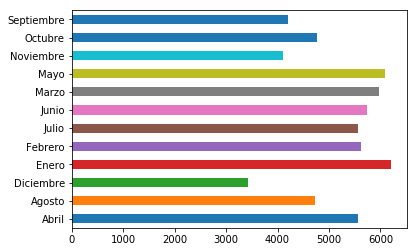

In [86]:
embarazoTest['MES'].value_counts().sort_index().plot.barh()

### Cantidad abortos por mes y edad

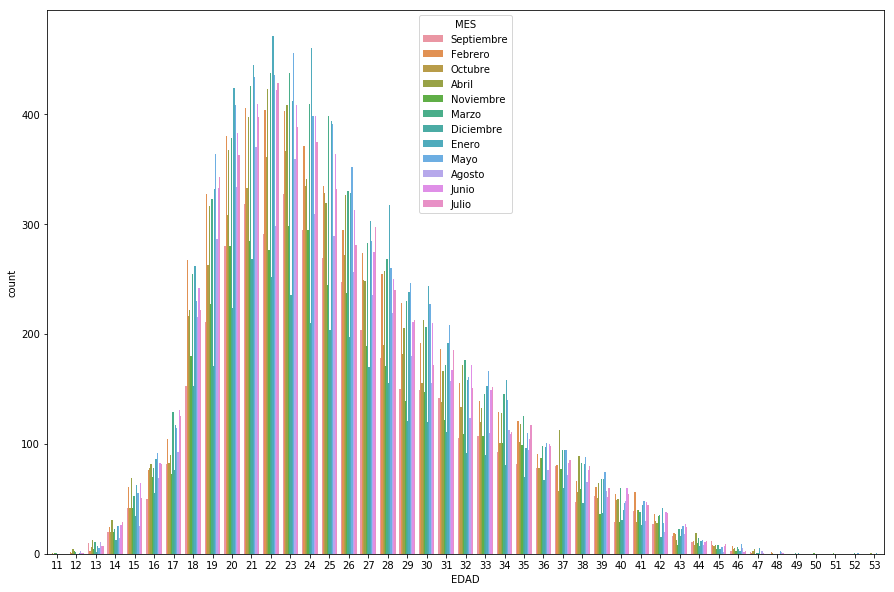

In [26]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="MES", data=embarazoTest)

### Cantidad de abortos por mes por hospital

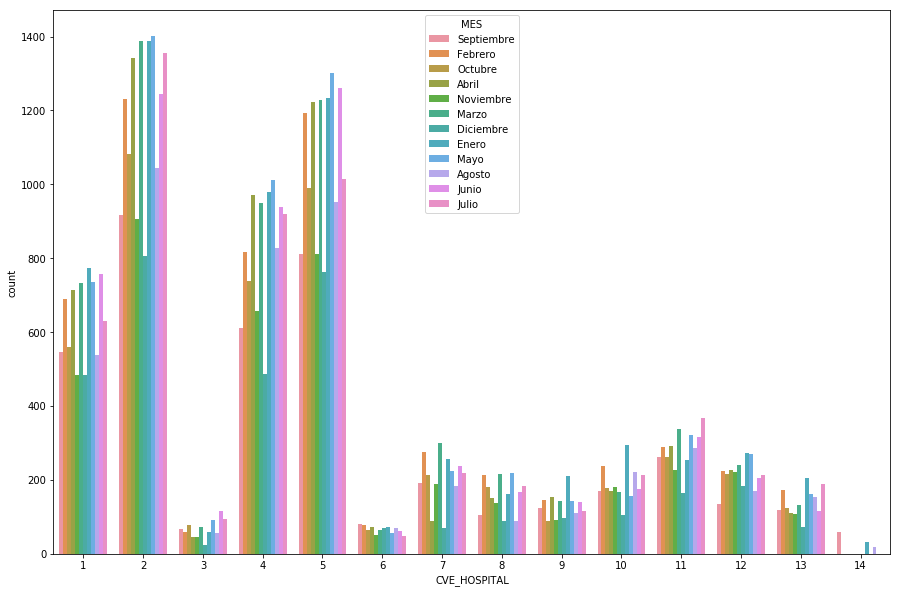

In [28]:
plt.figure(figsize=(15, 10))
sns.countplot(x="CVE_HOSPITAL", hue="MES", data=embarazoTest)

### Cantidad de abortos anteriores por edad

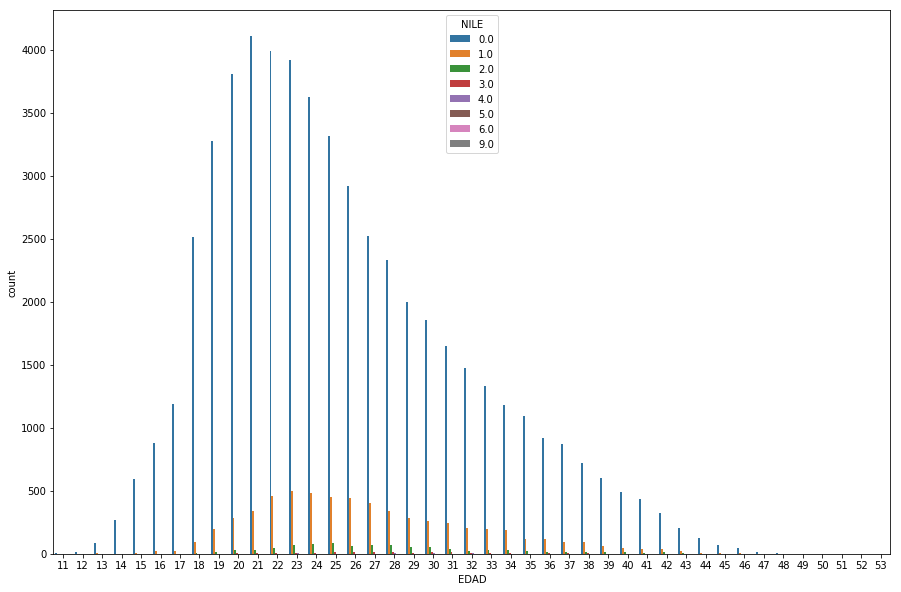

In [55]:
plt.figure(figsize=(15, 10))
sns.countplot(x="EDAD", hue="NILE", data=embarazoTest)

### Scatterplot de abortos que se han llevado acabo en cada clinica por edad y procedencia de paciente(estado originario)

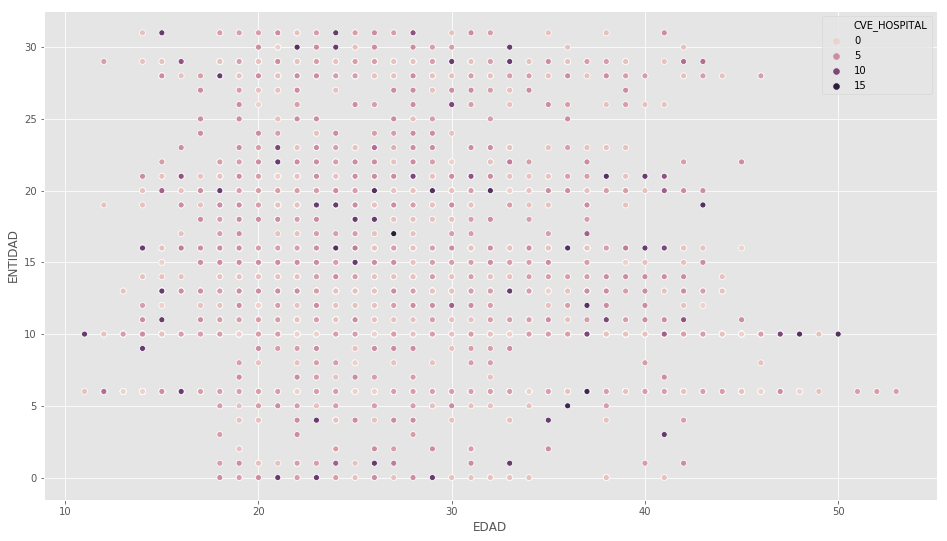

In [40]:
sns.scatterplot(x='EDAD', y="ENTIDAD", hue='CVE_HOSPITAL',data=embarazoTest)

Despues de haber analizado la gráfica anterior, me di cuenta que hay una esparcidad de datos cuando los vemos del punto de la clave del hospital, la edad y la entidad de la paciente. Esto me llamo a la idea de usar un método de clustering, como el k-means, utilizando la edad y la entidad como features y la clave del hospital como mi objetivo.

In [39]:
#convertir los valores cualitativos a valores cuantitativos utilizando LabelEncoder de scikit learn
labelEncoder = LabelEncoder()
labelEncoder.fit(embarazoTest['ENTIDAD'])
embarazoTest['ENTIDAD'] = labelEncoder.transform(embarazoTest['ENTIDAD'])
labelEncoder.fit(embarazoTest['MES'])
embarazoTest['MES'] = labelEncoder.transform(embarazoTest['MES'])
labelEncoder.fit(embarazoTest['NIVEL_EDU'])
embarazoTest['NIVEL_EDU'] = labelEncoder.transform(embarazoTest['NIVEL_EDU'])
labelEncoder.fit(embarazoTest['OCUPACION'])
embarazoTest['OCUPACION'] = labelEncoder.transform(embarazoTest['OCUPACION'])
labelEncoder.fit(embarazoTest['RELIGION'])
embarazoTest['RELIGION'] = labelEncoder.transform(embarazoTest['RELIGION'])
labelEncoder.fit(embarazoTest['EDOCIVIL_DESCRIPCION'])
embarazoTest['EDOCIVIL_DESCRIPCION'] = labelEncoder.transform(embarazoTest['EDOCIVIL_DESCRIPCION'])

#separando los conjuntos de los data en training y testing 
y = embarazoTest.CVE_HOSPITAL
x = embarazoTest.drop('CVE_HOSPITAL',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#obteniendo el arreglos de los features que se utilizaran dentro del k-means
X = np.array(x_train[["EDAD","ENTIDAD"]])

En la gráfica titulada "Curva Codito", la utilizamos para obtener el "punto codo" del algoritmo, el cual nos indica el valor optimo para k.

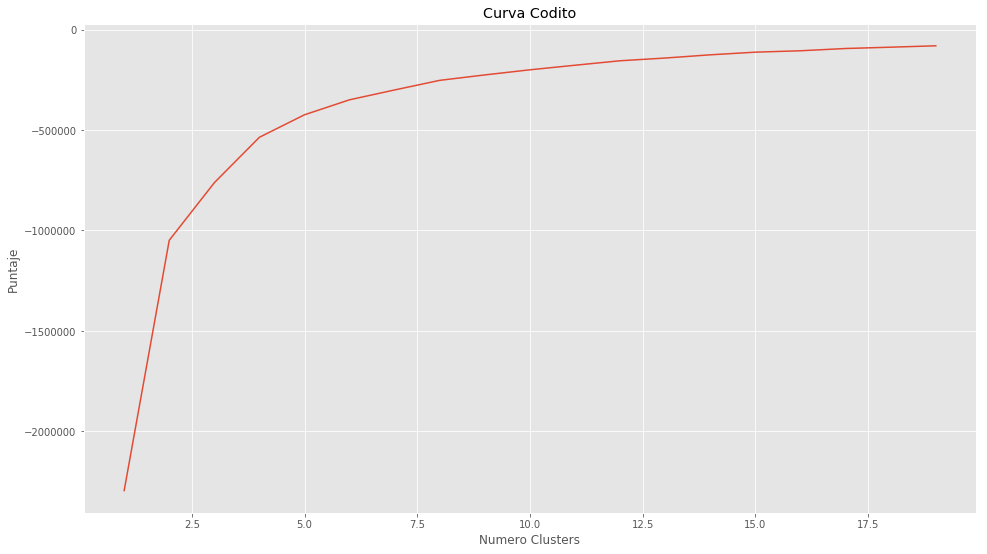

In [34]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Numero Clusters')
plt.ylabel('Puntaje')
plt.title('Curva Codito')
plt.show()

Analizando la gráfica podemos decir que el punto de codo puede ser 5 o 4, el cual nosotros optamos por 4.

En este segmento de código se ejecuta el algoritmo de k-means con el número de clusters establecido por el valor anterior que habiamos identificado a partir de la gráfica.

In [35]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[19.84845836  7.69056362]
 [35.3361094   7.49146617]
 [26.14094685  7.23585979]
 [24.72348485 21.65681818]]


### Gráfica de clusters

En esta sección se predice los labels y se gráfica los centroides, representado por una estrella de un color distinto, y los puntos que pertenecen a cada centroide.

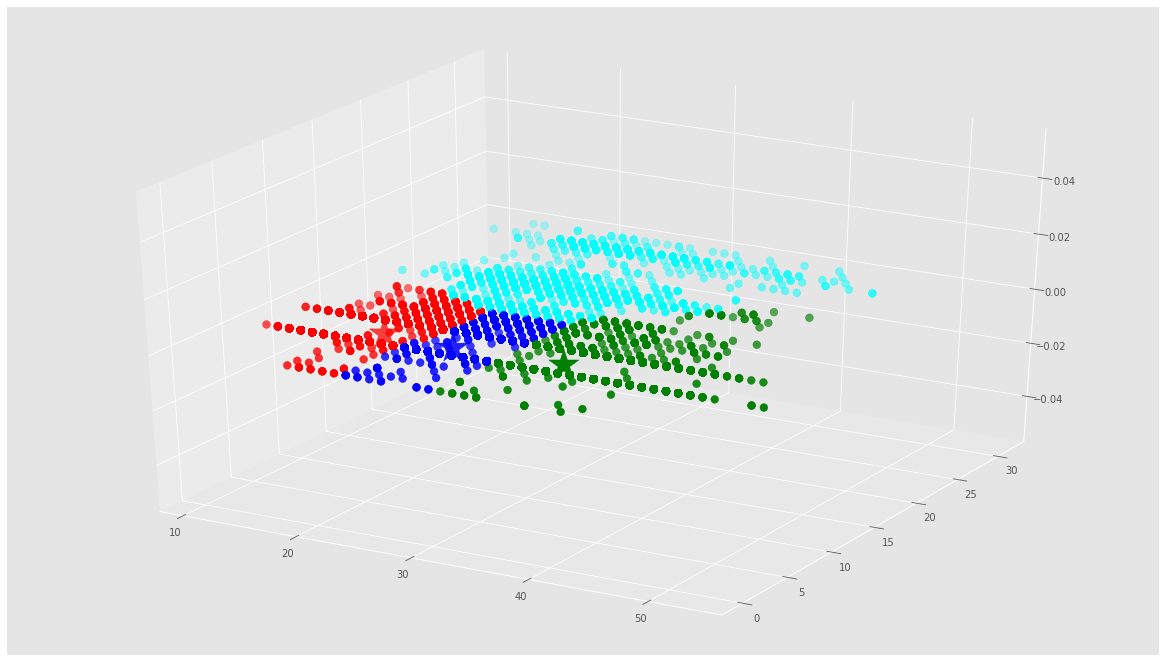

In [36]:
# prediciendo los cluster
labels = kmeans.predict(X)
# obteniendo los centros de los clusters
C = kmeans.cluster_centers_

#sección de código para generar gráfica 3d de los clusters
colores=['red','green','blue','cyan']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)

Esta gráfica es una representación de la anterior en una dimension 2D para mejor ver el clustering.

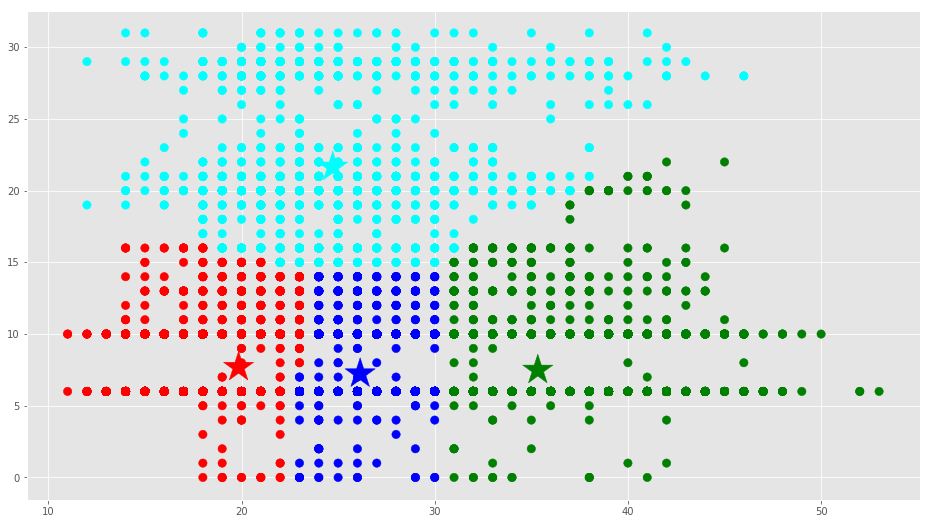

In [37]:
# obteniendo valores y graficando de una manera bidimensional
f1 = x_train['EDAD'].values
f2 = x_train['ENTIDAD'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

En esta sección se trata de predecir a que clase pertenecerá datos nuevos según el clustering establecido por el algoritmo de k-means con los datos de entrenamiento. Los datos que se usaron para validar son un subconjunto de nuestro dataframe original.

In [46]:
#clasificando nuevas entradas con nuestro set de pruebas
import sys
import collections
np.set_printoptions(threshold=sys.maxsize)

X_new = np.array(x_test[["EDAD","ENTIDAD"]]) 
new_labels = kmeans.predict(X_new)
#print(new_labels)
collections.Counter(new_labels)

Counter({0: 4368, 2: 4386, 1: 2367, 3: 324})